Noise Equivalent Bandwidth (Ne) = 13.3333 lp/mm


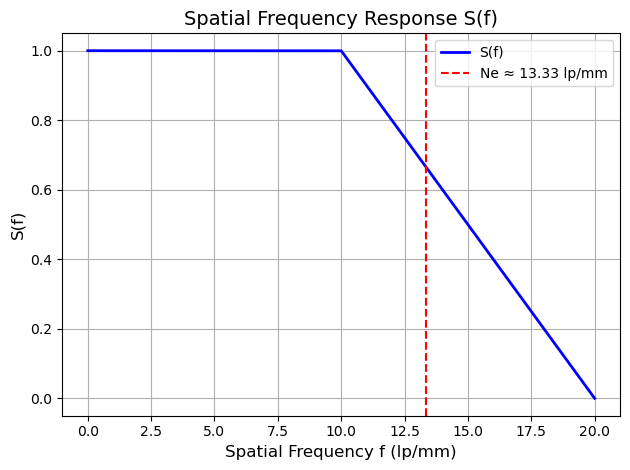

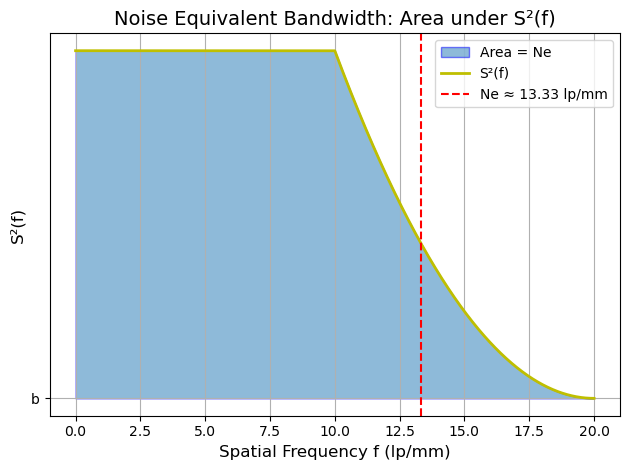

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Frequency axis 
f1 = np.arange(0, 10.001, 0.001)
f2 = np.arange(10.001, 20.001, 0.001)

#  S(f) 
S1 = np.ones_like(f1)                        # Constant region
S2 = 1 - ((f2 - 10) / 10)                    # Linearly decreasing
f = np.concatenate((f1, f2))
S = np.concatenate((S1, S2))

#  Compute Ne from S^2(f)
Ne = np.trapz(S**2, f)
print(f"Noise Equivalent Bandwidth (Ne) = {Ne:.4f} lp/mm")

# Plot Spatial Frequency Response S(f) 
plt.figure()
plt.plot(f, S, color= 'b' , linewidth=2, label='S(f)')
plt.axvline(x=Ne, color='r', linestyle='--', label=f'Ne ≈ {Ne:.2f} lp/mm')
plt.xlabel('Spatial Frequency f (lp/mm)', fontsize=12)
plt.ylabel('S(f)', fontsize=12)
plt.title('Spatial Frequency Response S(f)', fontsize=14)
plt.grid(True)
plt.legend(fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()

# Plot 2 Squared Spatial Frequency Response S^2(f) with area 
plt.figure()
plt.fill_between(f, S**2, 'b' , edgecolor='b', alpha=0.5, label='Area = Ne')
plt.plot(f, S**2, 'y' , linewidth=2, label='S²(f)')
plt.axvline(x=Ne, color='r', linestyle='--', label=f'Ne ≈ {Ne:.2f} lp/mm')
plt.xlabel('Spatial Frequency f (lp/mm)', fontsize=12)
plt.ylabel('S²(f)', fontsize=12)
plt.title('Noise Equivalent Bandwidth: Area under S²(f)', fontsize=14)
plt.grid(True)
plt.legend(fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()



In [2]:
import numpy as np
import pandas as pd

# Constants
Q = 2.58e-4         # Charge produced in 1 Roentgen exposure (in Coulombs)
e = 1.6e-19         # Elementary charge (Coulombs)
E_ion = 34          # Energy to create 1 ion pair (in eV)

# Calculate number of ion pairs generated in 1 kg of air
n_ions = Q / e

# Total energy required to generate all ion pairs (in eV)
E_total = n_ions * E_ion

# Define photon energy values from 30 keV to 150 keV in steps of 10 keV
photon_keV = np.arange(30, 151, 10)
photon_eV = photon_keV * 1e3  # Convert keV to eV

# Calculate number of photons required at each energy level
N_photons = E_total / photon_eV

# Create results table
result_table = pd.DataFrame({
    'PhotonEnergy_keV': photon_keV,
    'NumPhotons': N_photons
})

# Display the table
print(result_table)


    PhotonEnergy_keV    NumPhotons
0                 30  1.827500e+12
1                 40  1.370625e+12
2                 50  1.096500e+12
3                 60  9.137500e+11
4                 70  7.832143e+11
5                 80  6.853125e+11
6                 90  6.091667e+11
7                100  5.482500e+11
8                110  4.984091e+11
9                120  4.568750e+11
10               130  4.217308e+11
11               140  3.916071e+11
12               150  3.655000e+11


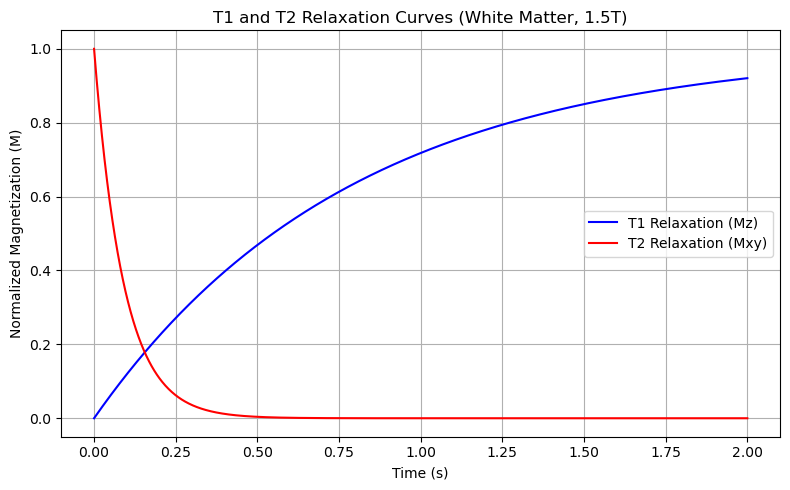

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Time vector from 0 to 2 seconds
t = np.linspace(0, 2, 1000)

# Relaxation times for white matter at 1.5T (s)
T1 = 0.790  # T1 in seconds
T2 = 0.090  # T2 in seconds

# Initial magnetization
M0 = 1.0

# Longitudinal relaxation (T1)
Mz = M0 * (1 - np.exp(-t / T1))

# Transverse relaxation (T2)
Mxy = M0 * np.exp(-t / T2)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(t, Mz, label='T1 Relaxation (Mz)', color='blue')
plt.plot(t, Mxy, label='T2 Relaxation (Mxy)', color='red')
plt.title('T1 and T2 Relaxation Curves (White Matter, 1.5T)')
plt.xlabel('Time (s)')
plt.ylabel('Normalized Magnetization (M)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


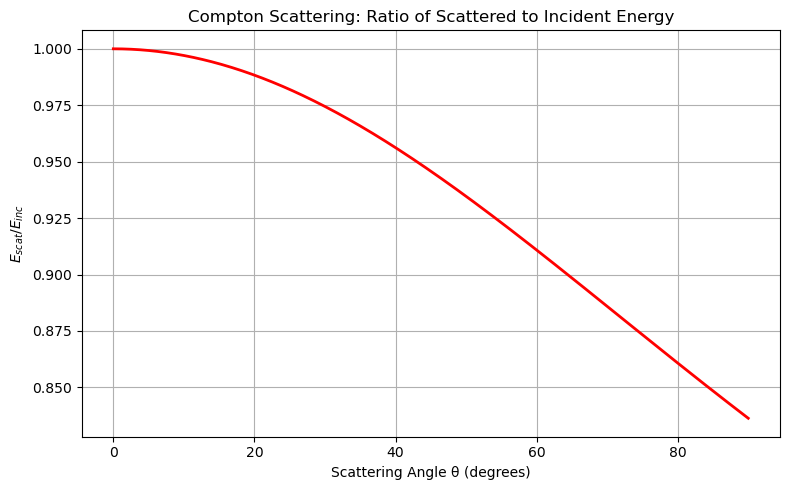

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
E_inc_keV = 100          # Incident X-ray energy in keV
m_ec2_keV = 511          # Rest mass energy of electron in keV

# Scattering angle in degrees and convert to radians
theta_deg = np.linspace(0, 90, 500)
theta_rad = np.deg2rad(theta_deg)

# Compton scattering energy ratio formula
E_ratio = 1 / (1 + (E_inc_keV / m_ec2_keV) * (1 - np.cos(theta_rad)))

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(theta_deg, E_ratio, color='red', linewidth=2)
plt.title('Compton Scattering: Ratio of Scattered to Incident Energy')
plt.xlabel('Scattering Angle θ (degrees)')
plt.ylabel(r'$E_{scat} / E_{inc}$')
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd

# Tissue name and corresponding HU range (min, max)
tissue_data = {
    "Air": (-1000, -1000),
    "Lung": (-600, -400),
    "Fat": (-100, -60),
    "Water": (0, 0),
    "Muscle": (10, 40),
    "Blood": (30, 45),
    "Soft tissue": (40, 80),
    "Bone": (400, 3000)
}

# Attenuation coefficient of water at 50 keV
mu_water = 0.193

# Compute min and max attenuation coefficients
results = []
for tissue, (hu_min, hu_max) in tissue_data.items():
    mu_min = mu_water * (1 + hu_min / 1000)
    mu_max = mu_water * (1 + hu_max / 1000)
    results.append({
        "Tissue": tissue,
        "HU Range": f"{hu_min} to {hu_max}",
        "μ Min (cm⁻¹)": round(mu_min, 4),
        "μ Max (cm⁻¹)": round(mu_max, 4)
    })

# Create DataFrame
df = pd.DataFrame(results)

# Display table
print(df)


        Tissue        HU Range  μ Min (cm⁻¹)  μ Max (cm⁻¹)
0          Air  -1000 to -1000        0.0000        0.0000
1         Lung    -600 to -400        0.0772        0.1158
2          Fat     -100 to -60        0.1737        0.1814
3        Water          0 to 0        0.1930        0.1930
4       Muscle        10 to 40        0.1949        0.2007
5        Blood        30 to 45        0.1988        0.2017
6  Soft tissue        40 to 80        0.2007        0.2084
7         Bone     400 to 3000        0.2702        0.7720


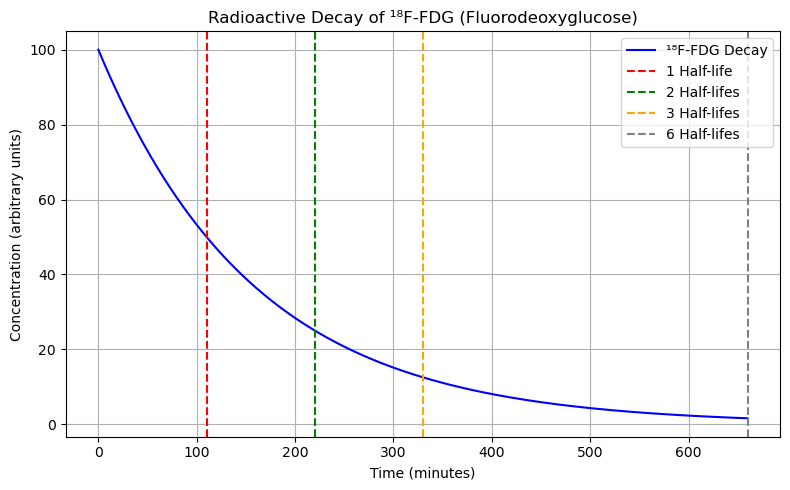

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Initial concentration
C0 = 100  # in arbitrary units

# Fluorine-18 half-life
half_life = 110  # in minutes

# Decay constant λ
lambda_decay = np.log(2) / half_life

# Time array: from 0 to 6 half-lives
t = np.linspace(0, 6 * half_life, 500)

# Radioactive decay formula
C_t = C0 * np.exp(-lambda_decay * t)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(t, C_t, label='¹⁸F-FDG Decay', color='blue')
plt.title('Radioactive Decay of ¹⁸F-FDG (Fluorodeoxyglucose)')
plt.xlabel('Time (minutes)')
plt.ylabel('Concentration (arbitrary units)')
plt.grid(True)

# Add vertical lines at 1, 2, 3, and 6 half-lives
for n, color in zip([1, 2, 3, 6], ['red', 'green', 'orange', 'gray']):
    plt.axvline(x=n * half_life, color=color, linestyle='--', label=f'{n} Half-life{"s" if n > 1 else ""}')

# Legend and layout
plt.legend()
plt.tight_layout()
plt.show()
